# Capstone Project
## Phase 1, Reading the data

In [1]:
#Reading positive reviews from the folder and appending it to posrev from training
import os
import pandas as pd
path = r'Y:\Analytics Vidhya\Data Science\Assignment\Dataset\aclImdb\train\pos'

posrev = []
files = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files:
    with open (f, 'r',encoding='iso-8859-1') as myfile:
        posrev.append(myfile.read())


In [2]:
#Assigning the positive reviews to a dataframe
trainpos=pd.DataFrame(posrev,columns=['review'])
trainpos['label']='positive'
trainpos.head()

,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,positive
1,Homelessness (or Houselessness as George Carli...,positive
2,Brilliant over-acting by Lesley Ann Warren. Be...,positive
3,This is easily the most underrated film inn th...,positive
4,This is not the typical Mel Brooks film. It wa...,positive


In [3]:
#Reading negative reviews from the folder and appending it to negrev from training
path = r'Y:\Analytics Vidhya\Data Science\Assignment\Dataset\aclImdb\train\neg'
negrev = []
files1 = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files1:
    with open (f, 'r',encoding='iso-8859-1') as myfile:
        negrev.append(myfile.read())


In [4]:
#Assigning the negative reviews to a dataframe
trainneg=pd.DataFrame(negrev,columns=['review'])
trainneg['label']='negative'
trainneg.head()

,review,label
0,Story of a man who has unnatural feelings for ...,negative
1,Airport '77 starts as a brand new luxury 747 p...,negative
2,This film lacked something I couldn't put my f...,negative
3,"Sorry everyone,,, I know this is supposed to b...",negative
4,When I was little my parents took me along to ...,negative


In [5]:
#Concatinating both positive and negative reviews into a single dataframe named training which contains all the reviews from 
#the training folder
training = pd.concat([trainpos, trainneg])
training.shape

(25000, 2)

In [6]:
#Reading positive reviews from the folder and appending it to posrev1 from testing
#Assigning the positive reviews to a dataframe
path = r'Y:\Analytics Vidhya\Data Science\Assignment\Dataset\aclImdb\test\pos'
posrev1 = []
files2 = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files2:
    with open (f, 'r',encoding='iso-8859-1') as myfile:
        posrev1.append(myfile.read())

testpos=pd.DataFrame(posrev1,columns=['review'])
testpos['label']='positive'
testpos.head()

,review,label
0,I went and saw this movie last night after bei...,positive
1,Actor turned director Bill Paxton follows up h...,positive
2,As a recreational golfer with some knowledge o...,positive
3,"I saw this film in a sneak preview, and it is ...",positive
4,Bill Paxton has taken the true story of the 19...,positive


In [7]:
#Reading negative reviews from the folder and appending it to negrev1 from testing
#Assigning the negative reviews to a dataframe
path = r'Y:\Analytics Vidhya\Data Science\Assignment\Dataset\aclImdb\test\neg'
negrev1 = []
files3 = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files3:
    with open (f, 'r',encoding='iso-8859-1') as myfile:
        negrev1.append(myfile.read())

testneg=pd.DataFrame(negrev1,columns=['review'])
testneg['label']='negative'
testneg.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,negative
1,This is an example of why the majority of acti...,negative
2,"First of all I hate those moronic rappers, who...",negative
3,Not even the Beatles could write songs everyon...,negative
4,Brass pictures (movies is not a fitting word f...,negative


In [8]:
#Concatinating both positive and negative reviews into a single dataframe named testing which contains all the reviews from 
#the testing folder
testing = pd.concat([testpos, testneg])
testing.shape

(25000, 2)

## Phase 1.2 - Cleaning the data

In [9]:
#Importing all the necessary packages
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import word_tokenize

In [10]:
# Tokenizing the data for easier manipulating
training['review'] = training['review'].str.lower().str.replace('[^a-z]', ' ').str.split()

In [11]:
#Removing stop words using a lambda function after downloading the stop words list from the nltk module
training['review'] = training['review'].apply(lambda x: [word for word in x if word not in set(stopwords.words('english'))])

In [12]:
training.head()

,review,label
0,"[bromwell, high, cartoon, comedy, ran, time, p...",positive
1,"[homelessness, houselessness, george, carlin, ...",positive
2,"[brilliant, acting, lesley, ann, warren, best,...",positive
3,"[easily, underrated, film, inn, brooks, cannon...",positive
4,"[typical, mel, brooks, film, much, less, slaps...",positive


In [13]:
#Stemming the words snowball stemmer as it is slightly faster and accurate than porterstemmer
#refer https://zhiyu-chen.gitbooks.io/notes-of-nlp-with-python-/content/stemmer.html
stemmer = SnowballStemmer("english")
training['review'] = training['review'].apply(lambda x:[stemmer.stem(word) for word in x])

In [14]:
training.head()

,review,label
0,"[bromwel, high, cartoon, comedi, ran, time, pr...",positive
1,"[homeless, houseless, georg, carlin, state, is...",positive
2,"[brilliant, act, lesley, ann, warren, best, dr...",positive
3,"[easili, underr, film, inn, brook, cannon, sur...",positive
4,"[typic, mel, brook, film, much, less, slapstic...",positive


In [15]:
# Lemmatization using wordnetlemmatizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
training['review'] = training['review'].apply(lambda x:[wordnet_lemmatizer.lemmatize(word) for word in x])

In [16]:
training.head()

,review,label
0,"[bromwel, high, cartoon, comedi, ran, time, pr...",positive
1,"[homeless, houseless, georg, carlin, state, is...",positive
2,"[brilliant, act, lesley, ann, warren, best, dr...",positive
3,"[easili, underr, film, inn, brook, cannon, sur...",positive
4,"[typic, mel, brook, film, much, le, slapstick,...",positive


In [17]:
# Joining the words back and saving it as a csv for easier access and saving time
training['review'] = training['review'].apply(lambda x: " ".join([word for word in x]))
training['review'].head()
training.to_csv("training.csv")

In [18]:
#importing the packages again for the ease of reading it from the saved csv file
import pandas as pd
import matplotlib as plt
import nltk

In [19]:
training = pd.read_csv("training.csv")

In [20]:
#Count vectorizer for transforming the reviews into integer values for the counting the values
from sklearn.feature_extraction.text import CountVectorizer
cvp = CountVectorizer()
cvn = CountVectorizer()
trp = training[training["label"] == "positive"]
trn = training[training["label"] == "negative"]
pv = cvp.fit_transform(trp.review)
nv = cvn.fit_transform(trn.review)

In [21]:
#Most common words used in the positive reviews in the dataset
sum_words = pv.sum(axis = 0)
pos_freq = [(word, sum_words[0, idx]) for word, idx in cvp.vocabulary_.items()]
pos_freq =sorted(pos_freq, key = lambda x: x[1], reverse=True)
print(pos_freq[:10])

[('br', 49236), ('film', 25314), ('movi', 22666), ('one', 14173), ('like', 10463), ('time', 8499), ('good', 7844), ('see', 7493), ('stori', 7481), ('charact', 7076)]


In [22]:
#Most common words used in the negative reviews in the dataset
sum_words = nv.sum(axis = 0)
neg_freq = [(word, sum_words[0, idx]) for word, idx in cvn.vocabulary_.items()]
neg_freq =sorted(neg_freq, key = lambda x: x[1], reverse=True)
print(neg_freq[:10])

[('br', 52636), ('movi', 29051), ('film', 22896), ('one', 13576), ('like', 12343), ('make', 8243), ('bad', 8002), ('even', 7801), ('time', 7699), ('get', 7667)]


In [23]:
#Most common words used in the entire dataset 
cv = CountVectorizer()
v = cv.fit_transform(training.review)
cv.get_feature_names()
sum_words = v.sum(axis = 0)
word_freq = [[word, sum_words[0, idx]] for word, idx in cv.vocabulary_.items()]
high_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
low_freq =sorted(word_freq, key = lambda x: x[1], reverse=False)
print(high_freq[:10])
print(low_freq[:10])

[['br', 101872], ['movi', 51717], ['film', 48210], ['one', 27749], ['like', 22806], ['time', 16198], ['good', 15368], ['make', 15212], ['charact', 14184], ['get', 14143]]
[['houseless', 1], ['godbi', 1], ['pyschosi', 1], ['listner', 1], ['stetner', 1], ['taupin', 1], ['sutdi', 1], ['alterior', 1], ['asesino', 1], ['milimet', 1]]


## Phase 3 -  Visualization

In [24]:
#WORDCLOUD
#Pip installing the wordcloud module and plotting the wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = training.review
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [25]:
#HISTOGRAM
#Manipulating the data into a series for ease of plotting the histogram for the frequency of words
import matplotlib as plt
import seaborn as sns
wf = cv.get_feature_names()
print(wf[:10])
wf = pd.Series(wf)
wf.head()

['aa', 'aaa', 'aaaaaaah', 'aaaaah', 'aaaaatch', 'aaaahhhhhhh', 'aaaand', 'aaaarrgh', 'aaah', 'aaargh']


0          aa
1         aaa
2    aaaaaaah
3      aaaaah
4    aaaaatch
dtype: object

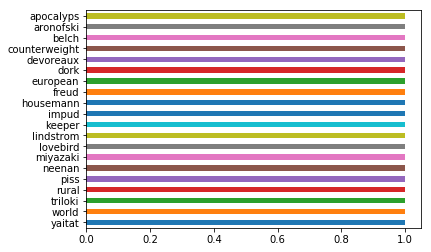

In [26]:
%matplotlib inline
wf.value_counts().head(20).sort_index(ascending=False).plot.barh()

In [27]:
v.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
#Cleaning, removing stopwords, stemming and lemmatization done for the testing dataset
testing['review'] = testing['review'].str.lower().str.replace('[^a-z]', ' ').str.split()
testing['review'] = testing['review'].apply(lambda x: [word for word in x if word not in set(stopwords.words('english'))])
testing['review'] = testing['review'].apply(lambda x:[stemmer.stem(word) for word in x])
testing['review'] = testing['review'].apply(lambda x:[wordnet_lemmatizer.lemmatize(word) for word in x])
testing['review'] = testing['review'].apply(lambda x: " ".join([word for word in x]))
testing.to_csv("testing.csv")

In [29]:
#Concatenating the training and testing dataset and saving it as a csv file for easy access
total = pd.concat([training, testing])
total.reset_index()
total.to_csv("total.csv")

In [30]:
import pandas as pd
import numpy as np
total = pd.read_csv("total.csv")

## Phase 4 - Hypothesis testing
#### In hypothesis tesing, The training dataset is used to evaluate the accuracy measures of each algorithm seperately and the one that has the highest accuracy is picked for the entire algorithm

In [31]:
#Splitting the training dataset into train and test dataset comfortable for classification Algorithms
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training["review"], training["label"], test_size=0.25, random_state=0)

In [32]:
#Naive Bayes Algorithm with the use of pipeline in which tfdif vectorizer and classifier itself is used
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

nb_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])

# train the model
nb_clf.fit(X_train, y_train)
# Predict the test cases
predicted = nb_clf.predict(X_test)

from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np

print('Accuracy achieved is ' + str(np.mean(predicted == y_test)))
print(metrics.classification_report(y_test, predicted, target_names= y_test)),
metrics.confusion_matrix(y_test, predicted)


Accuracy achieved is 0.85368


C:\Users\HP-PC\A3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 12500
  .format(len(labels), len(target_names))


             precision    recall  f1-score   support

   positive       0.84      0.87      0.86      6252
   negative       0.87      0.84      0.85      6248

avg / total       0.85      0.85      0.85     12500



array([[5447,  805],
       [1024, 5224]], dtype=int64)

In [33]:
# Support Vector machines algorithm is applied with the same pipeline
from sklearn.svm import SVC

svc_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', SVC()) ])

# train the model
svc_clf.fit(X_train, y_train)
# Predict the test cases
svc_predicted = svc_clf.predict(X_test)

print('Accuracy achieved is ' + str(np.mean(svc_predicted == y_test)))
print(metrics.classification_report(y_test, svc_predicted, target_names= y_test)),
metrics.confusion_matrix(y_test, svc_predicted)


Accuracy achieved is 0.49984
             precision    recall  f1-score   support

   positive       0.00      0.00      0.00      6252
   negative       0.50      1.00      0.67      6248

avg / total       0.25      0.50      0.33     12500



C:\Users\HP-PC\A3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 12500
  .format(len(labels), len(target_names))
C:\Users\HP-PC\A3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[   0, 6252],
       [   0, 6248]], dtype=int64)

In [34]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', RandomForestClassifier(n_estimators = 5)) ])

# train the model
rf_clf.fit(X_train, y_train)
# Predict the test cases
rf_predicted = rf_clf.predict(X_test)

print('Accuracy achieved is ' + str(np.mean(rf_predicted == y_test)))
print(metrics.classification_report(y_test, rf_predicted, target_names= y_test)),
metrics.confusion_matrix(y_test, rf_predicted)


Accuracy achieved is 0.73656
             precision    recall  f1-score   support

   positive       0.74      0.74      0.74      6252
   negative       0.74      0.74      0.74      6248

avg / total       0.74      0.74      0.74     12500



C:\Users\HP-PC\A3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 12500
  .format(len(labels), len(target_names))


array([[4614, 1638],
       [1655, 4593]], dtype=int64)

In [35]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')

dt_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', DecisionTreeClassifier(criterion = "gini")) ])

# train the model
dt_clf.fit(X_train, y_train)
# Predict the test cases
dt_predicted = dt_clf.predict(X_test)

print('Accuracy achieved is ' + str(np.mean(dt_predicted == y_test)))
print(metrics.classification_report(y_test, dt_predicted, target_names= y_test)),
metrics.confusion_matrix(y_test, dt_predicted)


Accuracy achieved is 0.72416
             precision    recall  f1-score   support

   positive       0.72      0.72      0.72      6252
   negative       0.72      0.73      0.72      6248

avg / total       0.72      0.72      0.72     12500



C:\Users\HP-PC\A3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 12500
  .format(len(labels), len(target_names))


array([[4518, 1734],
       [1714, 4534]], dtype=int64)

### Out of all the algorithms, the Naive Bayes had the most accuracy with 0.853. It was also the quickest to compile.
### SVM had the least accuracy with 0.499 and took the most time to compile

## Phase 5 - Supervised and Unsupervised Algorithms

In [ ]:
# Naive bayes for the total dataset 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total["review"], total["label"], test_size=0.25, random_state=0)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

nb_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])

# train the model
nb_clf.fit(X_train, y_train)
# Predict the test cases
predicted = nb_clf.predict(X_test)

from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np

print('Accuracy achieved is ' + str(np.mean(predicted == y_test)))
print(metrics.classification_report(y_test, predicted, target_names= y_test)),
metrics.confusion_matrix(y_test, predicted)

In [ ]:
# Supervised Algorithm no. 2 -  RandomforestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', RandomForestClassifier(n_estimators = 5)) ])

# train the model
rf_clf.fit(X_train, y_train)
# Predict the test cases
rf_predicted = rf_clf.predict(X_test)

print('Accuracy achieved is ' + str(np.mean(rf_predicted == y_test)))
print(metrics.classification_report(y_test, rf_predicted, target_names= y_test)),
metrics.confusion_matrix(y_test, rf_predicted)


In [36]:
# Importing the unsupervised data 
import os
path = r'Y:\Analytics Vidhya\Data Science\Assignment\Dataset\aclImdb\train\unsup'

unsup = []
files4 = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files4:
    with open (f, 'r',encoding='iso-8859-1') as myfile:
        unsup.append(myfile.read())
unlabelled =pd.DataFrame(unsup,columns=['review'])
unlabelled.head()

,review
0,"I admit, the great majority of films released ..."
1,"Take a low budget, inexperienced actors doubli..."
2,"Everybody has seen 'Back To The Future,' right..."
3,Doris Day was an icon of beauty in singing and...
4,"After a series of silly, fun-loving movies, 19..."


import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [38]:
# Tokenizing, removing stop words, stemming and lemmatizing the unsupervised data and saving it in a csv
unlabelled['review'] = unlabelled['review'].str.lower().str.replace('[^a-z]', ' ').str.split()
unlabelled['review'] = unlabelled['review'].apply(lambda x: [word for word in x if word not in set(stopwords.words('english'))])
unlabelled['review'] = unlabelled['review'].apply(lambda x:[stemmer.stem(word) for word in x])
unlabelled['review'] = unlabelled['review'].apply(lambda x:[wordnet_lemmatizer.lemmatize(word) for word in x])
unlabelled['review'] = unlabelled['review'].apply(lambda x: " ".join([word for word in x]))
unlabelled.to_csv("unlabelled.csv")
vectorizer = TfidfVectorizer()
ul = vectorizer.fit_transform(unlabelled["review"])

In [51]:
# Clustering using the Kmeans algorithm into 2 clusters, presumably positive and negative reviews
from sklearn.cluster import KMeans
words = vectorizer.get_feature_names()
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = 5, n_jobs = 1)
kmeans.fit(ul)
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
# The most common words on cluster 0 are all attributed to positive review and cluster 1 negative clearly


0 : br, movi, film, one, like, good, charact, watch, time, make
1 : movi, film, br, one, like, watch, good, time, see, make


In [52]:
mapping = {0 : "positive", 1 : "negative"}
mapped = [mapping[x] for x in kmeans.labels_]
unlabelled["labels"] = mapped

In [53]:
unlabelled.head()

,review,labels
0,admit great major film releas say dozen major ...,positive
1,take low budget inexperienc actor doubl produc...,negative
2,everybodi seen back futur right whether like m...,positive
3,dori day icon beauti sing act warm voic genius...,negative
4,seri silli fun love movi big year dori day yea...,positive


In [49]:
# Clustering using the Kmeans algorithm into 4 clusters, and checking if it can be labelled
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_jobs = 1)
kmeans.fit(ul)
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))


0 : br, movi, film, one, like, good, watch, charact, time, get
1 : br, movi, film, one, show, like, time, charact, stori, get
2 : movi, br, watch, like, bad, one, good, realli, see, time
3 : film, br, one, like, charact, movi, good, see, make, time


In [ ]:
# Clustering using the Kmeans algorithm into 3 clusters, and checking if it can be labelled
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_jobs = 1)
kmeans.fit(ul)
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))


### The dataset, when seperated into 4 clusters or 3 clusters, does not split the data which can be put into different classes.
### Therefore the clustering cannot be labelled using any class.